In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [30]:
def solve_demand_ces(alpha, rho, m, p1, p2):
    
    def utility(x):
        x1, x2 = x
        if x1 < 0 or x2 < 0:
            return np.inf
        else:
            return -(alpha * x1 ** rho + (1 - alpha) * x2 ** rho) ** (1 / rho)
    
    def budget_constraint(x):
        x1, x2 = x
        return m - p1 * x1 - p2 * x2
    
    constraints = ({"type": "eq", "fun": budget_constraint})
    initial_guess = [1, 1]
    result = minimize(utility, initial_guess, constraints=constraints)
    x1, x2 = result.x
    
    return round(x1, 2), round(x2, 2)

In [43]:
# Parameters
alpha = 0.5
m = 100
p1 = 5
p2 = 10

x1, x2 = solve_demand_ces(alpha, 0.99, m, p1, p2)
print(f"Good 1: {x1}", f"Good 2: {x2}")

x1, x2 = solve_demand_ces(alpha, 0.001, m, p1, p2)
print(f"Good 1: {x1}", f"Good 2: {x2}")

x1, x2 = solve_demand_ces(alpha, -200, m, p1, p2)
print(f"Good 1: {x1}", f"Good 2: {x2}")

Good 1: 20.0 Good 2: 0.0
Good 1: 10.0 Good 2: 5.0
Good 1: 6.68 Good 2: 6.66


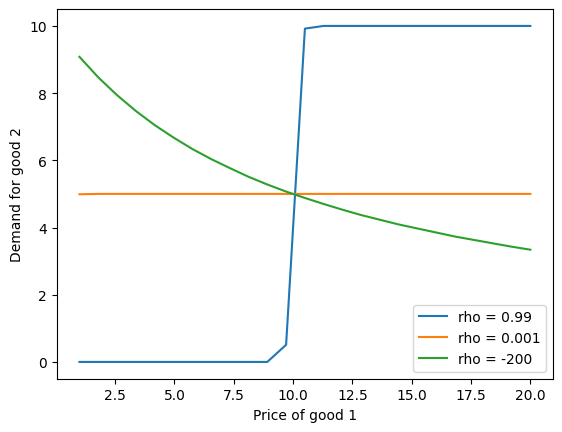

In [48]:
# Create a vector of 25 prices for good 1 between 1 and 10
p1_vals = np.linspace(1, 20, 25)

# Calculate demand for good 1 and good 2 at each price value
x = [solve_demand_ces(alpha, 0.99, m, p1, p2) for p1 in p1_vals]
x1_vals1, x2_vals1 = np.array(x).T
x = [solve_demand_ces(alpha, 0.001, m, p1, p2) for p1 in p1_vals]
x1_vals2, x2_vals2 = np.array(x).T
x = [solve_demand_ces(alpha, -200, m, p1, p2) for p1 in p1_vals]
x1_vals3, x2_vals3 = np.array(x).T

# Plot demand for good 1 as a function of price of good 1
plt.plot(p1_vals, x2_vals1, label='rho = 0.99')
plt.plot(p1_vals, x2_vals2, label='rho = 0.001')
plt.plot(p1_vals, x2_vals3, label='rho = -200')
plt.xlabel('Price of good 1')
plt.ylabel('Demand for good 2')
plt.legend()

/var/folders/m0/81ww_p5n651_dc02g0cwpk2w0000gq/T/ipykernel_39979/2841838834.py:6: RuntimeWarning: invalid value encountered in power
  return ((u ** (rho) - (alpha * x1 ** (rho))) / (1 - alpha)) ** (1/rho)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


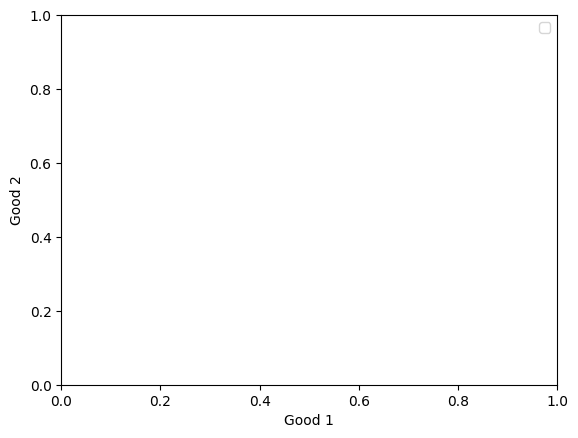

In [ ]:
def utility(alpha, rho, x1, x2):
    x1, x2 = x
    return (alpha * x1 ** rho + (1 - alpha) * x2 ** rho) ** (1 / rho)
    
def x2(x1, u, rho):
    return ((u ** (rho) - (alpha * x1 ** (rho))) / (1 - alpha)) ** (1/rho)

u = 3
x1_vals = np.linspace(1, 10, 24)
x2_vals1 = x2(x1_vals, u, 0.99) 
x2_vals2 = x2(x1_vals, u, 0.001)
x2_vals3 = x2(x1_vals, u, -200)

plt.plot(x1_vals, x2_vals1, label='rho = 0.99')
plt.plot(x1_vals, x2_vals2, label='rho = 0.001')
plt.plot(x1_vals, x2_vals3, label='rho = -200')
plt.xlabel('Good 1')
plt.ylabel('Good 2')
plt.legend()
